In [1]:
import sys
import os
import cv2
from pathlib import Path
from ultralytics import YOLO
from contextlib import contextmanager
from matplotlib import pyplot as plt
from IPython.display import display, clear_output, Image


In [2]:
# Find pyproject.toml in parent directories and add its directory to sys.path
path_curr = Path.cwd()
for parent in [path_curr] + list(path_curr.parents):
    pyproject_file = parent / "pyproject.toml"
    if pyproject_file.exists():
        sys.path.insert(0, str(parent))
        break

In [3]:
# Create output directory and save result images
dir_output = path_curr.parent / "output"
dir_output.mkdir(exist_ok=True)

In [4]:
# Load a pre-trained YOLO model (e.g., YOLOv8s for small, yolov8n for nano)
model = YOLO("yolo12s.pt") 

In [5]:
@contextmanager
def open_camera(index=0, backend=None):
    """Context manager that yields an open VideoCapture and
    always releases it and destroys windows on exit."""
    if backend is None:
        cap = cv2.VideoCapture(index)
    else:
        cap = cv2.VideoCapture(index, backend)
    try:
        yield cap
    finally:
        try:
            cap.release()
        except Exception:
            pass
        try:
            cv2.destroyAllWindows()
        except Exception:
            pass


In [6]:
def capture_and_predict(camera):

    ret, frame = camera.read()
    if not ret:
        print("No frame captured.")
    else:

        # Perform object detection on the captured image
        results = model.predict(frame) # , conf=0.25, imgsz=640)

        # Handle both list and single Results return types
        res = results[0] if isinstance(results, (list, tuple)) else results

        # Annotate image with detections (plot() returns a BGR image)
        annotated_bgr = res.plot()

        # Encode annotated BGR image to JPEG bytes and display inline,
        # clearing previous output so it appears as a live video.
        ok, buf = cv2.imencode('.jpg', annotated_bgr)
        if ok:
            clear_output(wait=False)
            display(Image(data=buf.tobytes()))
            # plt.pause(0.001)

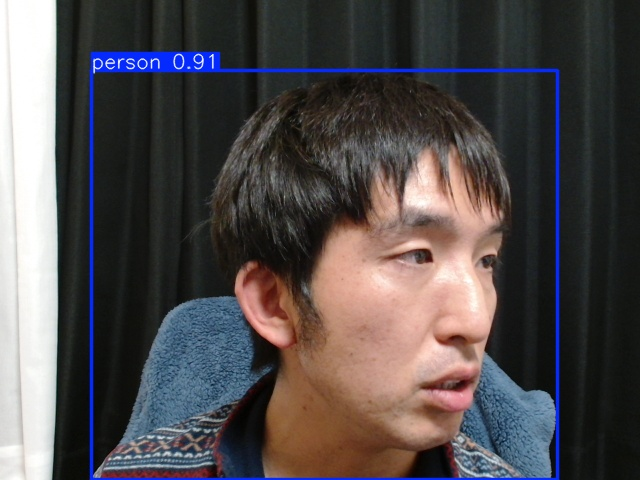

KeyboardInterrupt: 

In [7]:
with open_camera(0) as camera:

    if not camera or not camera.isOpened():
        print("Failed to open camera.")

    while True:
        capture_and_predict(camera)